### This is an implementation for Accelerated Gradient Descent methods.
 

#### Import numpy, matplotlib.pyplot and make it inline

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Momentum Gradient Descent 

In [15]:
def momentum_GD(in_data,target,learning_rate,gamma,iter):
    
    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    theta_zeros.append(0)
    theta_ones.append(0)
    hypothsis=[]
    itr=[]
    MSE=[]
    V = np.zeros([2,1])
    #print(x_vec.shape)
    
    for i in range(iter): 

        y_predict =  x_vec @ thetas 
    
        hypothsis.append(y_predict)
        
    
        gradient= (-1/m) * ((target-y_predict).transpose() @ x_vec )
        V = (gamma * V) + (learning_rate * gradient.transpose())
        thetas= thetas - V
       
    
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
        itr.append(i)
       
        theta_zeros.append(thetas[0])
        theta_ones.append(thetas[1])
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
    itr.append(i)
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr


To have a dataset or set of data points, generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [16]:
x= np.linspace(0,20)
a=-1
b=2
y= a*x + b

In [17]:
print(x)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.8367

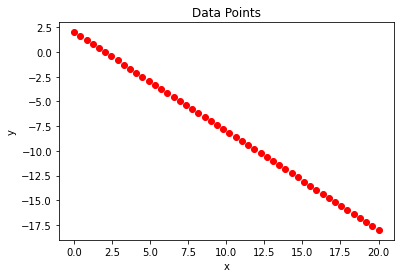

In [18]:
#### Plot data points. 
plt.scatter(x, y, marker='o', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.show()

In [19]:
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr = momentum_GD(x,y,0.0004,0.5,1000)
print(thetas)

[[-0.048282  ]
 [-0.83710386]]


In [ ]:
y_predicted= x_vec @ thetas

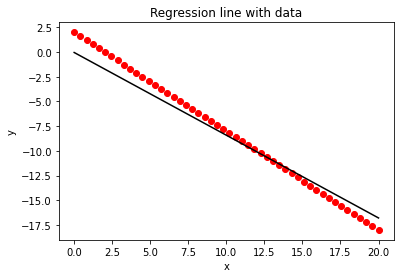

In [21]:
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression line with data")
plt.show()


In [22]:
# calculate score
r2_score(y, y_predicted)

0.9683968133847983

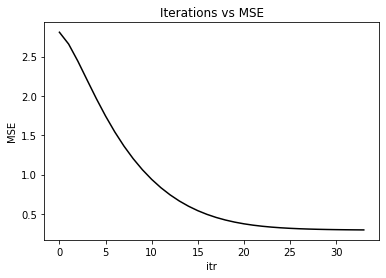

In [24]:
plt.plot(itr,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("itr")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


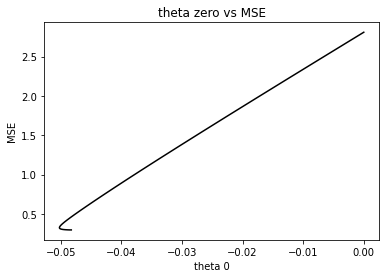

In [27]:
plt.plot(theta_zeros,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 0")
plt.ylabel("MSE")
plt.title("theta zero vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


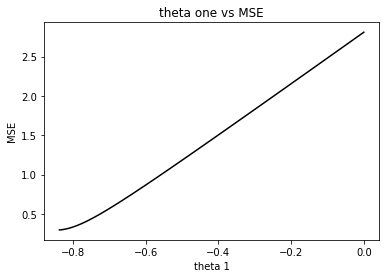

In [26]:
plt.plot(theta_ones,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 1")
plt.ylabel("MSE")
plt.title("theta one vs MSE")
plt.show()

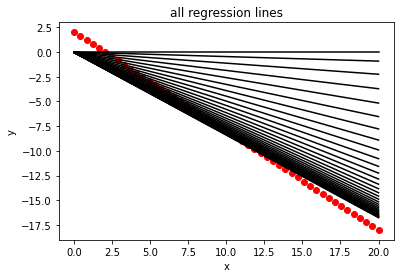

In [28]:
plt.scatter(x, y, marker='o', color='red')
for h in hypothsis:
    plt.plot(x,h, color='black',markerfacecolor='red',linestyle='-')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("all regression lines")
plt.show()

[[-0.04731908]
 [-0.82881266]]


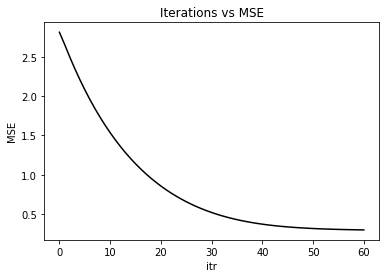

In [33]:
# try different hyperparameters
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr = momentum_GD(x,y,0.0004,0.1,1000)
print(thetas)
y_predicted= x_vec @ thetas
plt.plot(itr,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("itr")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


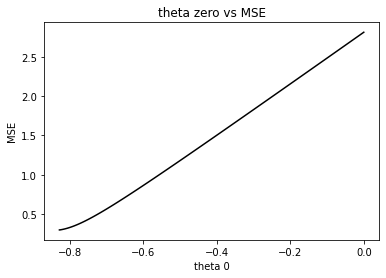

In [34]:
plt.plot(theta_ones,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 0")
plt.ylabel("MSE")
plt.title("theta zero vs MSE")
plt.show()

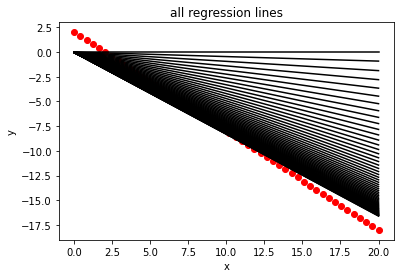

In [35]:
plt.scatter(x, y, marker='o', color='red')
for h in hypothsis:
    plt.plot(x,h, color='black',markerfacecolor='red',linestyle='-')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("all regression lines")
plt.show()

# Nesterov Accelerated GD

In [36]:
def Nesterov_Accelerated_GD(in_data,target,learning_rate,gamma,iter):
    
    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    thetas_temp= np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    theta_zeros.append(0)
    theta_ones.append(0)
    hypothsis=[]
    itr=[]
    MSE=[]
    V = np.zeros([2,1])
    #print(x_vec.shape)
    
    for i in range(iter): 

        thetas_temp = thetas- (gamma * V)
        y_predict =  x_vec @ thetas_temp 

        hypothsis.append(y_predict)
        
        gradient= (-1/m) * ((target-y_predict).transpose() @ x_vec )
        thetas= thetas_temp - (learning_rate * gradient.transpose())
        V = (gamma * V) + (learning_rate * gradient.transpose())
    
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
        itr.append(i)
       
        theta_zeros.append(thetas[0])
        theta_ones.append(thetas[1])
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
    itr.append(i)
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr


In [37]:
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr = Nesterov_Accelerated_GD(x,y,0.0004,0.5,1000)
print(thetas)
y_predicted= x_vec @ thetas

[[-0.04736663]
 [-0.83613259]]


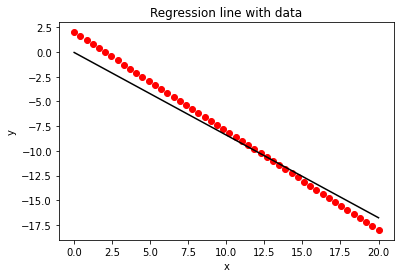

In [46]:
r2_score(y, y_predicted)
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression line with data")
plt.show()

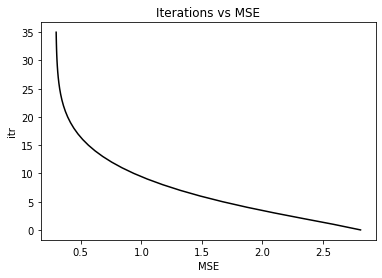

In [45]:
plt.plot(MSE,itr, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("MSE")
plt.ylabel("itr")
plt.title("Iterations vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


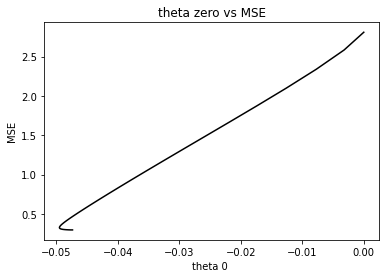

In [42]:
plt.plot(theta_zeros,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 0 ")
plt.ylabel("MSE")
plt.title("theta zero vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


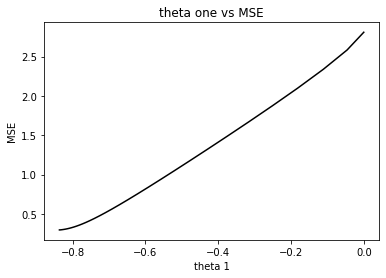

In [41]:
plt.plot(theta_ones,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 1")
plt.ylabel("MSE")
plt.title("theta one vs MSE")
plt.show()

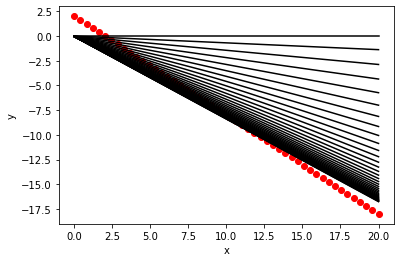

In [40]:
plt.scatter(x, y, marker='o', color='red')
for h in hypothsis:
    plt.plot(x,h, color='black',markerfacecolor='red',linestyle='-')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("all regression lines")
plt.show()